Importing important libraries

In [1]:
import numpy as np
import scipy as sp
from scipy import signal
import pandas as pd

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

Import data through pandas 

In [2]:
path = "./temp_data/"
file_name = path + "imuWed_Feb_14_setup2.csv" #"Right_to_left_paralle_to_earth.csv"
data_file = pd.read_csv(file_name, sep=',',header=0);

In [3]:
data_file.head()

,timestamp,orientation_x,orientation_y,orientation_z,orientation_w,AccX,AccY,AccZ,GyroX,GyroY,...,arm_synched,device_direction,warmupState,synced,battery_level,rssi,bluetooth_strength,player_hand,swing_type,stroke_type
0,1518638410850,-0.112122,-0.229004,-0.477966,0.840576,0.397949,0.202148,0.726562,-13.6250,20.1250,...,False,NaN,NaN,NaN,-1,0,0,right_handed,topspin,forehand
1,1518638410860,-0.113892,-0.227661,-0.479980,0.839539,0.490234,0.119141,0.673340,-21.6875,8.4375,...,False,NaN,NaN,NaN,-1,0,0,right_handed,topspin,forehand
2,1518638410875,-0.119385,-0.223694,-0.481934,0.838684,0.544922,-0.126953,0.754883,-31.7500,11.5000,...,False,NaN,NaN,NaN,-1,0,0,right_handed,topspin,forehand
3,1518638410899,-0.119263,-0.219421,-0.484497,0.838379,0.432617,-0.065430,0.811035,-10.1875,21.1250,...,False,NaN,NaN,NaN,-1,0,0,right_handed,topspin,forehand
4,1518638410920,-0.117676,-0.214355,-0.488403,0.837646,0.340820,0.114258,0.862305,-18.0625,22.8750,...,False,NaN,NaN,NaN,-1,0,0,right_handed,topspin,forehand


No handlers could be found for logger "matplotlib.legend"


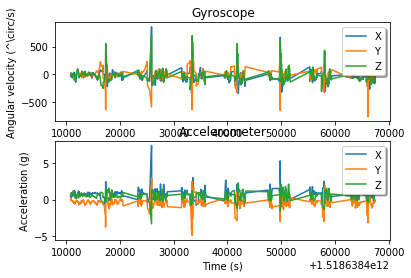

In [4]:
time = data_file['timestamp'];
gyr = data_file[['GyroX', 'GyroY', 'GyroZ']];
acc = data_file[['AccX', 'AccY', 'AccZ']] ;
quaternion = data_file[['orientation_w', 'orientation_x', 'orientation_y', 'orientation_z']]


plt.figure('Position');
plt.subplot(211);
graph = plt.plot(time[:-1000], gyr[:-1000]);
plt.title('Gyroscope');
plt.xlabel('Time (s)');
plt.ylabel('Angular velocity (^\circ/s)');
plt.legend(graph, ('X', 'Y', 'Z'),shadow=True, fancybox=True, loc="upper right");
plt.subplot(212);
graph = plt.plot(time[:-1000], acc[:-1000]);
#plt.plot(time, stationary, 'k', 'LineWidth', 2);
plt.title('Accelerometer');
plt.xlabel('Time (s)');
plt.ylabel('Acceleration (g)');
plt.legend(shadow=True, fancybox=True, loc="upper right");
plt.legend(graph, ('X', 'Y', 'Z'),shadow=True, fancybox=True, loc="upper right");


In [5]:
##Find magnitude of accelerometer(x,y,z) = sqrt(x*x +y*y+ z*z)
acc_mag = np.linalg.norm(acc, axis=1);




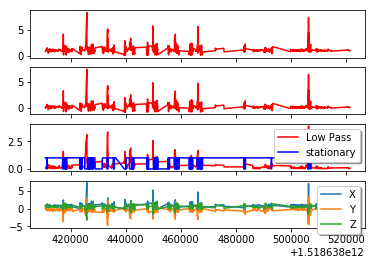

In [6]:

### this can help us detect the stroke itself.
## need to meet a professor from Electrical Department, who can help us understand this part

#HP filter accelerometer data

filtCutOff = .001;
sampleFrequecy = 50;
number_of_pass = 1

b, a =  signal.butter(number_of_pass, (2*filtCutOff) / sampleFrequecy, 'high', analog=False)
acc_magFilt = signal.filtfilt(b, a, acc_mag)

f, (ax4, ax1, ax2, ax3) = plt.subplots(4, sharex=True)
ax4.plot(time, acc_mag, 'r', label="Magnitude");

ax1.plot(time, acc_magFilt, 'r', label="High Pass");
#ax2.plot(time[250:500], stationary[250:500], 'b', label="stationary");
#ax1.xlabel('Time (s)');
#ax1.ylabel('Angular velocity (^\circ/s)');


# Compute absolute value
acc_magFilt = np.absolute(acc_magFilt);

# LP filter accelerometer data
filtCutOff = 5.0;
b, a = signal.butter(number_of_pass, ( 2 * (filtCutOff) / (sampleFrequecy) ), 'low')
acc_magFilt = signal.filtfilt(b, a, acc_magFilt)


stationary = acc_magFilt < .5;


ax2.plot(time, acc_magFilt, 'r', label="Low Pass");
ax2.plot(time, stationary, 'b', label="stationary");


#stationary = acc_magFilt < 0.5; ### this can help us detect the 
ax2.legend(shadow=True, fancybox=True, loc="upper right");


graph = ax3.plot(time, acc);
#ax3.plot(time[1:500], acc_mag[1:500], 'm');
#ax3.xlabel('Time (s)');
#ax3.ylabel('Angular velocity (^\circ/s)');
ax3.legend(graph, ('X', 'Y', 'Z'),shadow=True, fancybox=True, loc="upper right");



 ### this can help us detect the 





In [7]:
# Convert acceleration measurements to m/s/s
'''quaternion
# Plot translational accelerations
plt.figure('Accelerations');
plt.plot(time[1:100], acc['orientation_x'][1:100], 'r');
plt.plot(time[1:100], acc['orientation_y'][1:100], 'g');
plt.plot(time[1:100], acc['orientation_z'][1:100], 'b');
plt.title('Acceleration');
plt.xlabel('Time (s)');
plt.ylabel('Acceleration (m/s/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");'''

'quaternion\n# Plot translational accelerations\nplt.figure(\'Accelerations\');\nplt.plot(time[1:100], acc[\'orientation_x\'][1:100], \'r\');\nplt.plot(time[1:100], acc[\'orientation_y\'][1:100], \'g\');\nplt.plot(time[1:100], acc[\'orientation_z\'][1:100], \'b\');\nplt.title(\'Acceleration\');\nplt.xlabel(\'Time (s)\');\nplt.ylabel(\'Acceleration (m/s/s)\');\nplt.legend(shadow=True, fancybox=True, loc="upper right");'

In [8]:
def quaternProd(a, b):
    ab = np.zeros(a.shape);
    ab[:,0] = a[:,0]*b[:,0] - a[:,1]*b[:,1] - a[:,2]*b[:,2] - a[:,3]*b[:,3];
    ab[:,1] = a[:,0]*b[:,1] + a[:,1]*b[:,0] - a[:,2]*b[:,3] + a[:,3]*b[:,2];
    ab[:,2] = a[:,0]*b[:,2] + a[:,1]*b[:,3] + a[:,2]*b[:,0] - a[:,3]*b[:,1];
    ab[:,3] = a[:,0]*b[:,3] - a[:,1]*b[:,2] + a[:,2]*b[:,1] + a[:,3]*b[:,0];
    return ab;

def quaternConj(q):
    ab = np.zeros(q.shape);
    ab[:,0] = q[:,0]
    ab[:,1] = -q[:,1]
    ab[:,2] = -q[:,2]
    ab[:,3] = -q[:,3]
    return ab

def quaternRotate(v, q):
    (row, col) = v.shape;
    a = np.append(np.zeros((row,1)), v, 1)
    #print acc[1:5]
    v0XYZ = quaternProd(quaternProd(q, a), quaternConj(q));
    return v0XYZ[:, 1:4];

def quatern2rotMat(q):
    (rows, cols) = q.shape;
    R = np.zeros(3,3, rows);
    R[0,0,:] = 2 * q[:,0] ** 2 - 1 + 2 * q[:,1]** 2;
    R[0,1,:] = 2 * (q[:,1] * q[:,2] + q[:,0] * q[:,3]);
    R[0,2,:] = 2 * (q[:,1] * q[:,3] - q[:,0] * q[:,2]);
    R[1,0,:] = 2 * (q[:,1] * q[:,2] - q[:,0] * q[:,3]);
    R[1,1,:] = 2 * q[:,0] ** 2 - 1 + 2 * q[:,2] ** 2;
    R[1,2,:] = 2 * (q[:,2] * q[:,3] + q[:,0] * q[:,1]);
    R[2,0,:] = 2 * (q[:,1] * q[:,3] + q[:,0] * q[:,2]);
    R[2,1,:] = 2 * (q[:,2] * q[:,3] - q[:,0] * q[:,1]);
    R[2,2,:] = 2 * q[:,0] ** 2 - 1 + 2 * q[:,3] ** 2;
    return R

In [9]:
#Compute translational accelerations

accelerometer = acc.as_matrix() * 9.8
quat = quaternion.as_matrix()

##Rotate body accelerations to Earth frame
accelerometer = quaternRotate( accelerometer, quaternConj(quat));

#accelerometer = quaternRotate( accelerometer, quat);

#Convert acceleration measurements to m/s/s
#acc = acc * 9.81;




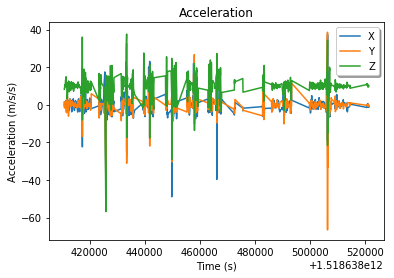

In [10]:
plt.figure('Accelerations');
g = plt.plot(time, accelerometer);
plt.title('Acceleration');
plt.xlabel('Time (s)');
plt.ylabel('Acceleration (m/s/s)');
plt.legend(g, ('X', 'Y', 'Z'), shadow=True, fancybox=True, loc="upper right");


In [11]:
stationary_diff = np.diff(stationary)

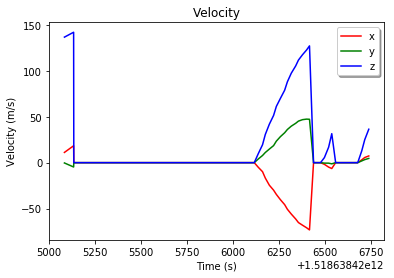

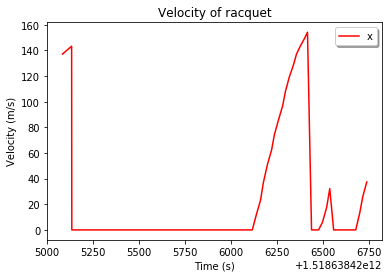

In [12]:
#removing earth's gravity(default ) from z axis

#acc[:,2] = acc[:,2] - 9.81;
#samplePeriod = 50;
accelerometer[:,2] = accelerometer[:,2];
#Integrate acceleration to yield velocity
vel = np.zeros(acc.shape);
for t in range(1,len(vel)):
    vel[t,:] = vel[t - 1,:] + accelerometer[t,:]# * samplePeriod;
    if(stationary[t] == False):
        vel[t,:] = [0, 0, 0];     # force zero velocity when foot stationary
    
velDrift = np.zeros(vel.shape);
             
plt.figure('Velocity');
plt.plot(time[500:550], vel[500:550, 0], 'r', label="x");
plt.plot(time[500:550], vel[500:550, 1], 'g', label="y");
plt.plot(time[500:550], vel[500:550, 2], 'b', label="z");
plt.title('Velocity');
plt.xlabel('Time (s)');
plt.ylabel('Velocity (m/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");

velocity_norm =  np.linalg.norm(vel, axis=1)


plt.figure('Velocity max');
plt.plot(time[500:550], velocity_norm[500:550], 'r', label="x");
plt.title('Velocity of racquet');
plt.xlabel('Time (s)');
plt.ylabel('Velocity (m/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");


In [13]:
stationary_diff = np.diff(stationary+0)
stationaryStart = np.where(stationary_diff == -1)[0]
stationaryEnd = np.where(stationary_diff == 1)[0]


stationaryStart = stationaryStart - 20

stationaryStart = stationaryEnd + 20
    


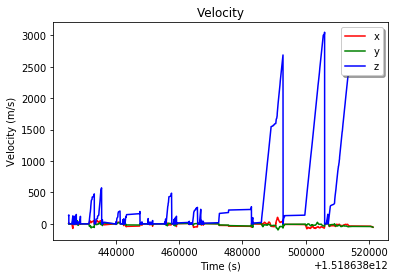

In [14]:

velDrift = np.zeros(vel.shape);
for i in range(0, len(stationaryEnd)):
    rateDiff = (stationaryEnd[i] - stationaryStart[i])
    driftRate = np.divide(vel[stationaryEnd[i] - 1, :], rateDiff)
    enum = np.arange(0, (stationaryEnd[i] - stationaryStart[i])-1);
    enum = np.array([enum, enum, enum])
    drift = enum.T * driftRate
    velDrift[stationaryStart[i]:stationaryEnd[i]-1, :] = drift;

vel = vel - velDrift;             
plt.figure('Velocity');
plt.plot(time[500:8000], vel[500:8000,0], 'r', label="x");
plt.plot(time[500:8000], vel[500:8000,1], 'g', label="y");
plt.plot(time[500:8000], vel[500:8000,2], 'b', label="z");
plt.title('Velocity');
plt.xlabel('Time (s)');
plt.ylabel('Velocity (m/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");

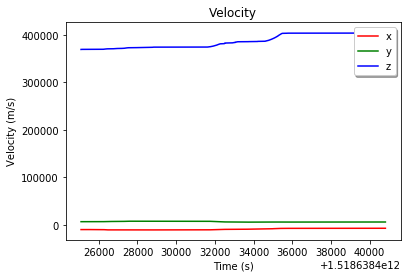

In [15]:
# Compute translational position
# Integrate velocity to yield position


pos = np.zeros(vel.shape);
for t in range(2, len(pos)):
    pos[t] = pos[t-1] + vel[t];    # integrate velocity to yield position

    
    
             
plt.figure('Position');
plt.plot(time[500:850], pos[500:850,0], 'r', label="x");
plt.plot(time[500:850], pos[500:850,1], 'g', label="y");
plt.plot(time[500:850], pos[500:850,2], 'b', label="z");
plt.title('Velocity');
plt.xlabel('Time (s)');
plt.ylabel('Velocity (m/s)');
plt.legend(shadow=True, fancybox=True, loc="upper right");

In [16]:
enum = np.arange(0, (stationaryEnd[0] - stationaryStart[0]));

In [17]:
print enum

[]


In [18]:
def find_packetLoss():
    
    return;
    